# Práctica 5: primer modelo de clasificación n-dimensional

Hay muchas técnicas diferentes para encontrar las características más relevantes, ¿cómo saber cuál usar?. Un enfoque sólido consiste en evaluar los modelos utilizando diferentes métodos, y seleccionar el método que resulte en un modelo con el mejor rendimiento. 

En esta sección, evaluaremos un modelo de Regresión Logística con todas las características en comparación con un modelo construido a partir de características seleccionadas por chi-cuadrado y aquellas características seleccionadas a través de información mutua. La regresión logística es un buen modelo para probar los métodos de selección de características, ya que puede tener un mejor rendimiento si se eliminan del modelo las características irrelevantes.

### Buscando el modelo de clasificación con todas las características

Como primer paso, evaluaremos un modelo de `LogisticRegression` utilizando todas las características disponibles. El modelo se genera dado el conjunto de datos de entrenamiento (train) y se evalúa con el conjunto de datos de prueba (test).

Nota: los resultados pueden variar dada la naturaleza estocástica del algoritmo de aprendizaje. Intenta ejecutar el ejemplo varias veces.

### Imports

In [1]:
import pandas as pd
import numpy as np
from pandas import read_csv
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

**Nota:** antes de implementar los siguientes métodos, debemos asegurarnos de que el `DataFrame` sólo contiene características categóricas.

In [2]:
file = "../conjunto_de_datos_visita_museos_2018.csv"
df = pd.read_csv(file)
df = df.dropna(axis=1)
names = ['ANIO_ESTAD', 'ENT_REGIS', 'MES_ENTREV', 'DIA_ENTREV', 'SEXO', 'EDAD',
       'ENT_RESID', 'MUN_RESID', 'PAIS_RESID', 'NACIONALID', 'PAIS_EXTRA',
       'ESCOLARIDA', 'OCUPACION', 'LENGUA_1', 'ESTIM_FAM', 'PRIM_VISIT',
       'VIS_OTROS', 'MEDIO_1', 'PLAN_VISIT', 'MV_ACOMP', 'MV_CULTURA',
       'MV_APREND', 'MV_ESCOLAR', 'MV_LABORAL', 'MV_CONOCER', 'MV_ENTRETE',
       'MV_EDIFICI', 'MV_TALLER', 'MV_OTRO', 'MEDIO_TRAN', 'TIEMPO_TRA',
       'TIPO_ENTRA', 'PAV_NADIE', 'PAV_FAMILI', 'PAV_PAREJA', 'PAV_AMIGO',
       'PAV_COMPA', 'PAV_ESCOLA', 'PAV_TURIST', 'PAV_OTRO', 'SU_SALAS',
       'SU_TIENDA', 'SU_VISGUIA', 'SU_AUDIOG', 'SU_TALLER', 'SU_ACADEM',
       'SU_ACULTUR', 'SU_BIBLIOT', 'SU_ARCHIVO', 'SU_SILLA', 'SU_OTRO',
       'OPIN_EXPOS', 'DUR_VIS_H', 'DUR_VIS_M', 'REPETIR_VI', 'RECOMIE_VI',
       'EVAL_GRAL', 'M_NOVIS_1']
df = df.astype(int)
for i in names :
    #print(len(df[i].unique()))
    if(len(df[i].unique()) == 2):
        x =(df[i].unique())
        df[i].replace({
            x[0] : "a",
            x[1] : "b"
        }, inplace=True)
    if(len(df[i].unique()) == 3):
        x =(df[i].unique())
        df[i].replace({
            x[0] : "a",
            x[1] : "b",
            x[2] : "c"
        }, inplace=True)
    if(len(df[i].unique()) > 3):
        bins=np.linspace(min(df[i]),max(df[i]),4)
        names=["a","b","c"]
        df[i]=pd.cut(df[i],bins,labels=names)
df = df.dropna(axis = 1)
df = df.drop("ANIO_ESTAD", 1)
X = df.drop("SEXO",1)
y = df["SEXO"]
df = pd.concat([X, y], axis = 1)
df.to_csv("Archivo.csv", header = True, index = False)

In [5]:
#Cargamos el dataset
def load_dataset(filename):
    #Como un Dataframe
    data = read_csv(filename, header=None)
    #Creamos una matriz con los datos
    dataset = data.values
    #Dividimos en X y y
    X = dataset[:, :-1]
    y = dataset[:,-1]
    #Forzamos el tipo string
    X = X.astype(str)
    return X, y
 
#Preparamos los datos de entrada, X
def prepare_inputs(X_train, X_test):
    oe = OrdinalEncoder()
    oe.fit(X_train)
    X_train_enc = oe.transform(X_train)
    oe.fit(X_test)
    X_test_enc = oe.transform(X_test)
    return X_train_enc, X_test_enc
 
#Preparamos los datos de salida, y
def prepare_targets(y_train, y_test):
    le = LabelEncoder()
    le.fit(y_train)
    y_train_enc = le.transform(y_train)
    le.fit(y_test)
    y_test_enc = le.transform(y_test)
    return y_train_enc, y_test_enc

In [6]:
#Cargamos el dataset
file = "Archivo.csv"
X, y = load_dataset(file)

#Dividimos los datos de entrada, X, y salida, y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
#Preparamos a X
X_train_enc, X_test_enc = prepare_inputs(X_train, X_test)
#Preparamos ay
y_train_enc, y_test_enc = prepare_targets(y_train, y_test)

#Buscamos el modelo
model = LogisticRegression(solver='lbfgs')
model.fit(X_train_enc, y_train_enc)

#Encontramos el modelo
yhat = model.predict(X_test_enc)

#Evaluamos el desempeño del modelo encontrado
accuracy = accuracy_score(y_test_enc, yhat)
print('Accuracy/exactitud: %.2f' % (accuracy*100), '%')

C:\tools\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\tools\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


Accuracy/exactitud: 32.21 %


C:\tools\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


### Buscando el modelo de clasificación con selección de características vía Chi-cuadrada

In [7]:
#Selección de características
def select_features(X_train, y_train, X_test):
    fs = SelectKBest(score_func=chi2, k=4)
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    
    for i in range(len(fs.scores_)):
        print('Característica %d: %f' % (i, fs.scores_[i]))
    
    plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
    return X_train_fs, X_test_fs

Característica 0: 1.529338
Característica 1: 1.300473
Característica 2: 4.937005
Característica 3: 7.260486
Característica 4: 2.551268
Característica 5: 5.196306
Característica 6: 1.785974
Característica 7: 8.957263
Característica 8: 3.118490
Característica 9: 4.522414
Característica 10: 1.467200
Característica 11: 1.432662
Característica 12: 1.625090
Característica 13: 3.628840
Característica 14: 1.553032
Característica 15: 1.009721
Característica 16: 2.012231
Característica 17: 29.240811
Característica 18: 62.312828
Característica 19: 12.904847
Característica 20: 1.272791
Característica 21: 1.429136
Característica 22: 1.244081
Característica 23: 1.087693
Característica 24: 2.086943
Característica 25: 1.400693
Característica 26: 1.173254
Característica 27: 4.429956
Característica 28: 1.031778
Característica 29: 5.145648
Característica 30: 1.017344
Característica 31: 1.053569
Característica 32: 1.050230
Característica 33: 1.147077
Característica 34: 1.004253
Característica 35: 1.051052

C:\tools\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Accuracy/exactitud: 46.50 %


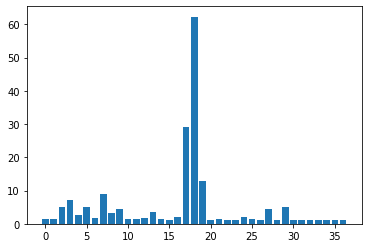

In [8]:
#Cargamos el dataset
file = "Archivo.csv"
X, y = load_dataset(file)

#Dividimos los datos de entrada, X, y salida, y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
#Preparamos a X
X_train_enc, X_test_enc = prepare_inputs(X_train, X_test)
#Preparamos a y
y_train_enc, y_test_enc = prepare_targets(y_train, y_test)
#Selección de características
X_train_fs, X_test_fs = select_features(X_train_enc, y_train_enc, X_test_enc)

#Buscamos el modelo
model = LogisticRegression(solver='lbfgs')
model.fit(X_train_fs, y_train_enc)

#Encontramos el modelo
yhat = model.predict(X_test_fs)

#Evaluamos el desempeño del modelo encontrado
accuracy = accuracy_score(y_test_enc, yhat)
print('Accuracy/exactitud: %.2f' % (accuracy*100), '%')

### Buscando el modelo de clasificación con selección de características vía Información Mutua

In [9]:
#Selección de características
def select_features(X_train, y_train, X_test):
    fs = SelectKBest(score_func=mutual_info_classif, k=4)
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    
    for i in range(len(fs.scores_)):
        print('Característica %d: %f' % (i, fs.scores_[i]))
    
    plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
    return X_train_fs, X_test_fs

Característica 0: 0.007571
Característica 1: 0.013895
Característica 2: 0.010847
Característica 3: 0.006143
Característica 4: 0.006047
Característica 5: 0.008192
Característica 6: 0.009863
Característica 7: 0.008033
Característica 8: 0.010586
Característica 9: 0.009982
Característica 10: 0.013363
Característica 11: 0.003544
Característica 12: 0.010172
Característica 13: 0.010018
Característica 14: 0.013918
Característica 15: 0.016267
Característica 16: 0.007913
Característica 17: 0.015424
Característica 18: 0.009061
Característica 19: 0.012984
Característica 20: 0.006310
Característica 21: 0.014475
Característica 22: 0.011523
Característica 23: 0.012663
Característica 24: 0.013788
Característica 25: 0.010325
Característica 26: 0.007639
Característica 27: 0.007767
Característica 28: 0.013973
Característica 29: 0.013969
Característica 30: 0.013512
Característica 31: 0.013649
Característica 32: 0.013461
Característica 33: 0.015703
Característica 34: 0.015539
Característica 35: 0.013812
Ca

C:\tools\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Accuracy/exactitud: 46.50 %


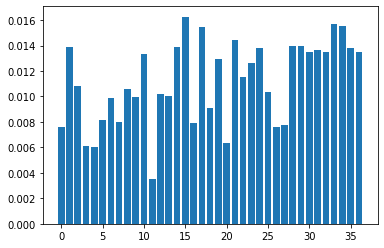

In [10]:
#Cargamos el dataset
file = "Archivo.csv"
X, y = load_dataset(file)

#Dividimos los datos de entrada, X, y salida, y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
#Preparamos a X
X_train_enc, X_test_enc = prepare_inputs(X_train, X_test)
#Preparamos a y
y_train_enc, y_test_enc = prepare_targets(y_train, y_test)
#Selección de características
X_train_fs, X_test_fs = select_features(X_train_enc, y_train_enc, X_test_enc)

#Buscamos el modelo
model = LogisticRegression(solver='lbfgs')
model.fit(X_train_fs, y_train_enc)

#Encontramos el modelo
yhat = model.predict(X_test_fs)

#Evaluamos el desempeño del modelo encontrado
accuracy = accuracy_score(y_test_enc, yhat)
print('Accuracy/exactitud: %.2f' % (accuracy*100), '%')